In [1]:
from loader import load_pop_metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['font.size'] = 12

import sys
sys.path.append("/auto/users/hellerc/code/projects/nat_pupil_ms/")
from global_settings import CPN_SITES, HIGHR_SITES
import colors

In [2]:
modelname = "factor_analysis_pca_evoked"

In [3]:
sites = CPN_SITES + HIGHR_SITES
batches = [331]*len(CPN_SITES) + [322 if s.startswith("BOL")==False else 294 for s in HIGHR_SITES]
columns = ["bp_sv", "sp_sv", "bp_dim", "sp_dim", "bp_dim_sem", "sp_dim_sem", "bp_ls", "sp_ls", "all_dim", "all_dim_sem", "site", "batch", "nCells"]
metrics = pd.DataFrame(columns=columns, index=range(len(sites)))
metrics_all = pd.DataFrame(columns=columns, index=range(len(sites)))
for i, (s, b) in enumerate(zip(sites, batches)):
    r = load_pop_metrics(site=s, batch=b, modelname=modelname)
    metrics.iloc[i] = [r["bp_sv"], r["sp_sv"], r["bp_dim95"], r["sp_dim95"], r["bp_dim_sem"], r["sp_dim_sem"], r["bp_loading_sim"], r["sp_loading_sim"], r["all_dim95"], r["all_dim95_sd"], s, b, r["nCells"]]
    metrics_all.iloc[i] = [r["final_fit"]["bp_sv_all"], r["final_fit"]["sp_sv_all"], r["final_fit"]["bp_dim95_all"], r["final_fit"]["sp_dim95_all"], r["bp_dim_sem"], r["sp_dim_sem"], r["final_fit"]["bp_ls_all"], r["final_fit"]["sp_ls_all"], r["final_fit"]["all_dim95_all"], r["all_dim_sem"], s, b, r["nCells"]]

In [4]:
#metrics = metrics_all
metrics[metrics.site=="TNC013a"]

,bp_sv,sp_sv,bp_dim,sp_dim,bp_dim_sem,sp_dim_sem,bp_ls,sp_ls,all_dim,all_dim_sem,site,batch,nCells
7,0.38097,0.372642,8,5.06667,0.565194,0.338898,0.0469487,0.226656,6.03333,0.179505,TNC013a,331,59
30,0.4291,0.380691,4.51389,3.08333,0.211492,0.242156,0.16789,0.164106,2,0,TNC013a,322,13


Text(0.5, 1.0, 'nDim')

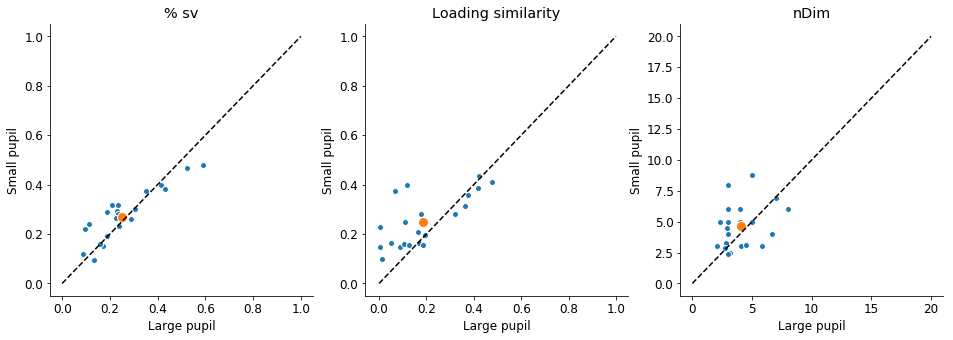

In [8]:
mask = metrics.batch==322 #[True]*len(metrics) #
f, ax = plt.subplots(1, 3, figsize=(16, 5))

ax[0].scatter(metrics[mask]["bp_sv"], metrics[mask]["sp_sv"], edgecolor="white")
ax[0].scatter(metrics[mask]["bp_sv"].mean(), metrics[mask]["sp_sv"].mean(), s=100, edgecolor="white")
ax[0].plot([0, 1], [0, 1], "k--")
ax[0].set_xlabel("Large pupil")
ax[0].set_ylabel("Small pupil")
ax[0].set_title("% sv")

ax[1].scatter(metrics[mask]["bp_ls"], metrics[mask]["sp_ls"], edgecolor="white")
ax[1].scatter(metrics[mask]["bp_ls"].mean(), metrics[mask]["sp_ls"].mean(), s=100, edgecolor="white")
ax[1].plot([0, 1], [0, 1], "k--")
ax[1].set_xlabel("Large pupil")
ax[1].set_ylabel("Small pupil")
ax[1].set_title("Loading similarity")

ax[2].scatter(metrics[mask]["bp_dim"], metrics[mask]["sp_dim"], edgecolor="white")
ax[2].scatter(metrics[mask]["bp_dim"].mean(), metrics[mask]["sp_dim"].mean(), s=100, edgecolor="white")
ax[2].plot([0, 20], [0, 20], "k--")
ax[2].set_xlabel("Large pupil")
ax[2].set_ylabel("Small pupil")
ax[2].set_title("nDim")

Text(0.5, 0, 'max(big pupil dim, small pupil dim)')

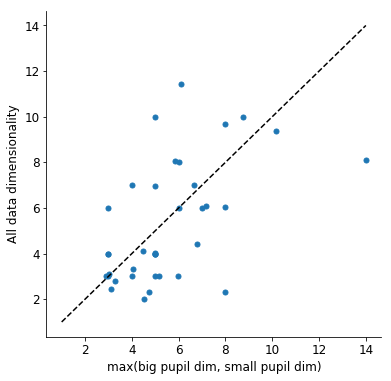

In [9]:
# compare n dims found over all data vs. max(ndim_large, ndim_small)
m = [True]*len(metrics) #metrics.batch==322
f, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.scatter(metrics[m][["bp_dim", "sp_dim"]].max(axis=1), metrics[m]["all_dim"], s=25)
ax.plot([1, 14], [1, 14], "k--")
ax.set_ylabel("All data dimensionality")
ax.set_xlabel("max(big pupil dim, small pupil dim)")

## compare nDims vs. nCells for each site

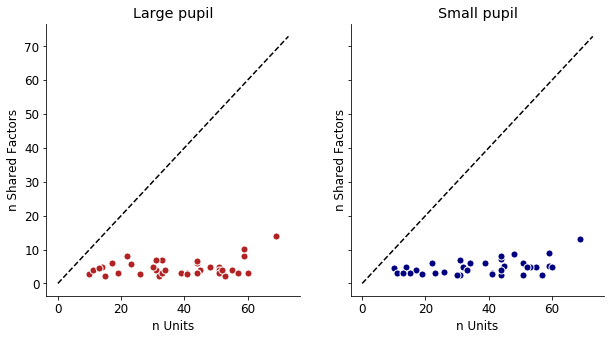

In [10]:
mask =  [True]*len(metrics) #
f, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

ax[0].scatter(metrics[mask]["nCells"], metrics[mask]["bp_dim"], s=50, color=colors.LARGE, edgecolor="white")
ax[0].set_ylabel("n Shared Factors")
ax[0].set_xlabel("n Units")
ax[0].set_title("Large pupil")

ax[1].scatter(metrics[mask]["nCells"], metrics[mask]["sp_dim"], s=50, color=colors.SMALL, edgecolor="white")
ax[1].set_ylabel("n Shared Factors")
ax[1].set_xlabel("n Units")
ax[1].set_title("Small pupil")

ll, ul = ax[0].get_xlim()
ll = 0
ax[0].plot([ll, ul], [ll, ul], "k--")
ax[1].plot([ll, ul], [ll, ul], "k--")

In [6]:
# load decoding results for faModel and for raw data
import charlieTools.nat_sounds_ms.decoding as decoding
from path_settings import DPRIME_DIR, PY_FIGURES_DIR3, CACHE_PATH
from global_settings import ALL_SITES, LOWR_SITES, HIGHR_SITES, CPN_SITES
import os

rmodel = "dprime_jk10_zscore_fixtdr2-fa"
famodel = "dprime_faModel_jk10_zscore_fixtdr2-fa"
site = "AMT020a"
batch = 331

loader = decoding.DecodingResults()
fn = os.path.join(DPRIME_DIR, str(batch), site, rmodel+'_TDR.pickle')
results = loader.load_results(fn, cache_path=None, recache=False)
df = results.numeric_results.loc[results.evoked_stimulus_pairs]

fn = os.path.join(DPRIME_DIR, str(batch), site, famodel+'_TDR.pickle')
results = loader.load_results(fn, cache_path=None, recache=False)
df_fa = results.numeric_results.loc[results.evoked_stimulus_pairs]

[nems.configs.defaults INFO] Saving log messages to /tmp/nems/NEMS 2022-03-18 011050.log
[root INFO] loading pickle from /auto/users/hellerc/results/nat_pupil_ms/dprime_final/331/AMT020a/dprime_jk10_zscore_fixtdr2-fa_TDR.pickle
[root INFO] loading pickle from /auto/users/hellerc/results/nat_pupil_ms/dprime_final/331/AMT020a/dprime_faModel_jk10_zscore_fixtdr2-fa_TDR.pickle


[numexpr.utils INFO] NumExpr defaulting to 8 threads.


Text(0.5, 1.0, '0.526')

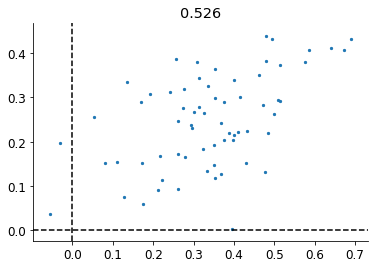

In [7]:
plt.scatter((df["bp_dp"]-df["sp_dp"]) / (df["bp_dp"]+df["sp_dp"]), (df_fa["bp_dp"]-df_fa["sp_dp"])/(df_fa["bp_dp"]+df_fa["sp_dp"]), s=5)
plt.axhline(0, linestyle="--", color="k")
plt.axvline(0, linestyle="--", color="k")
plt.title(np.round(np.corrcoef((df["bp_dp"]-df["sp_dp"]) / (df["bp_dp"]+df["sp_dp"]), (df_fa["bp_dp"]-df_fa["sp_dp"])/(df_fa["bp_dp"]+df_fa["sp_dp"]))[0,1], 3))

In [8]:
metrics[metrics.site=='AMT020a']

,bp_sv,sp_sv,bp_dim,sp_dim,bp_dim_sem,sp_dim_sem,bp_ls,sp_ls,all_dim,all_dim_sem,site,batch
0,0.184163,0.265674,4,5.16667,0.533051,0.773924,0.179796,0.245742,3,0,AMT020a,331


In [10]:
# does diversity in delta-dprime correlate with changes in a specific pop. metric?
# plot mean / std of delta dprime as a function of each pop metric
rmodel = "dprime_jk10_zscore_fixtdr2-fa_noiseDim-1"
famodel = "dprime_faModel_jk10_zscore_fixtdr2-fa_noiseDim-1"
loader = decoding.DecodingResults()

ddp_summary = pd.DataFrame(index=range(metrics.shape[0]), columns=["mean", "std", "mean_fa", "std_fa", "pred_cc", "site", "batch"])
rdf = []
fadf = []
for i, (s, b) in enumerate(zip(sites, batches)):
    fn = os.path.join(DPRIME_DIR, str(b), s, rmodel+'_TDR.pickle')
    results = loader.load_results(fn, cache_path=None, recache=False)
    df = results.numeric_results.loc[results.evoked_stimulus_pairs]

    fn = os.path.join(DPRIME_DIR, str(b), s, famodel+'_TDR.pickle')
    results = loader.load_results(fn, cache_path=None, recache=False)
    df_fa = results.numeric_results.loc[results.evoked_stimulus_pairs]

    df["delta"] = (df["bp_dp"]-df["sp_dp"]) / (df["bp_dp"]+df["sp_dp"])
    df["site"] = s
    df["batch"] = b
    df_fa["delta"] = (df_fa["bp_dp"]-df_fa["sp_dp"])/(df_fa["bp_dp"]+df_fa["sp_dp"])
    df_fa["site"] = s
    df_fa["batch"] = b

    rdf.append(df)
    fadf.append(df_fa)

    ddp_summary.iloc[i] = [df["delta"].mean(), df["delta"].std(), df_fa["delta"].mean(), df_fa["delta"].std(), np.corrcoef(df["delta"], df_fa["delta"])[0, 1], s, b]

df = pd.concat(rdf)
df_fa = pd.concat(fadf)

[root INFO] loading pickle from /auto/users/hellerc/results/nat_pupil_ms/dprime_final/331/AMT020a/dprime_jk10_zscore_fixtdr2-fa_noiseDim-1_TDR.pickle
[root INFO] loading pickle from /auto/users/hellerc/results/nat_pupil_ms/dprime_final/331/AMT020a/dprime_faModel_jk10_zscore_fixtdr2-fa_noiseDim-1_TDR.pickle
[root INFO] loading pickle from /auto/users/hellerc/results/nat_pupil_ms/dprime_final/331/AMT026a/dprime_jk10_zscore_fixtdr2-fa_noiseDim-1_TDR.pickle
[root INFO] loading pickle from /auto/users/hellerc/results/nat_pupil_ms/dprime_final/331/AMT026a/dprime_faModel_jk10_zscore_fixtdr2-fa_noiseDim-1_TDR.pickle
[root INFO] loading pickle from /auto/users/hellerc/results/nat_pupil_ms/dprime_final/331/ARM029a/dprime_jk10_zscore_fixtdr2-fa_noiseDim-1_TDR.pickle
[root INFO] loading pickle from /auto/users/hellerc/results/nat_pupil_ms/dprime_final/331/ARM029a/dprime_faModel_jk10_zscore_fixtdr2-fa_noiseDim-1_TDR.pickle
[root INFO] loading pickle from /auto/users/hellerc/results/nat_pupil_ms/dpr

In [40]:
merge = ddp_summary.merge(metrics, on=["site", "batch"])
#merge = merge[merge.batch==331]

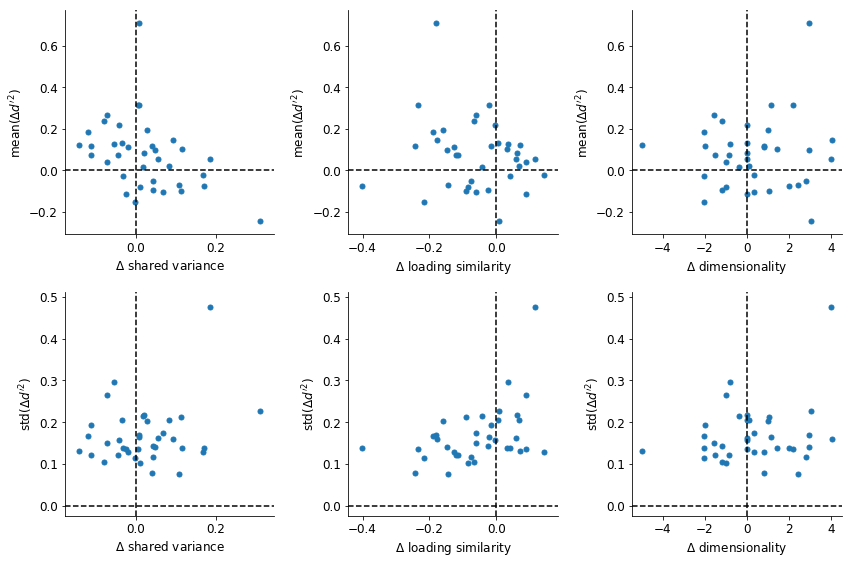

In [41]:
f, ax = plt.subplots(2, 3, figsize=(12, 8)) 

ax[0, 0].scatter(merge["bp_sv"]-merge["sp_sv"], merge["mean_fa"], s=25)
ax[0, 0].set_xlabel(r"$\Delta$ shared variance")
ax[0, 0].set_ylabel(r"mean($\Delta d'^2$)")

ax[0, 1].scatter(merge["bp_ls"]-merge["sp_ls"], merge["mean_fa"], s=25)
ax[0, 1].set_xlabel(r"$\Delta$ loading similarity")
ax[0, 1].set_ylabel(r"mean($\Delta d'^2$)")

ax[0, 2].scatter(merge["bp_dim"]-merge["sp_dim"], merge["mean_fa"], s=25)
ax[0, 2].set_xlabel(r"$\Delta$ dimensionality")
ax[0, 2].set_ylabel(r"mean($\Delta d'^2$)")

ax[1, 0].scatter(merge["bp_sv"]-merge["sp_sv"], merge["std_fa"], s=25)
ax[1, 0].set_xlabel(r"$\Delta$ shared variance")
ax[1, 0].set_ylabel(r"std($\Delta d'^2$)")

ax[1, 1].scatter(merge["bp_ls"]-merge["sp_ls"], merge["std_fa"], s=25)
ax[1, 1].set_xlabel(r"$\Delta$ loading similarity")
ax[1, 1].set_ylabel(r"std($\Delta d'^2$)")

ax[1, 2].scatter(merge["bp_dim"]-merge["sp_dim"], merge["std_fa"], s=25)
ax[1, 2].set_xlabel(r"$\Delta$ dimensionality")
ax[1, 2].set_ylabel(r"std($\Delta d'^2$)")

for a in ax.flatten():
    a.axvline(0, linestyle="--", color="k")
    a.axhline(0, linestyle="--", color="k")

f.tight_layout()

In [42]:
import statsmodels.api as sm
import seaborn as sns

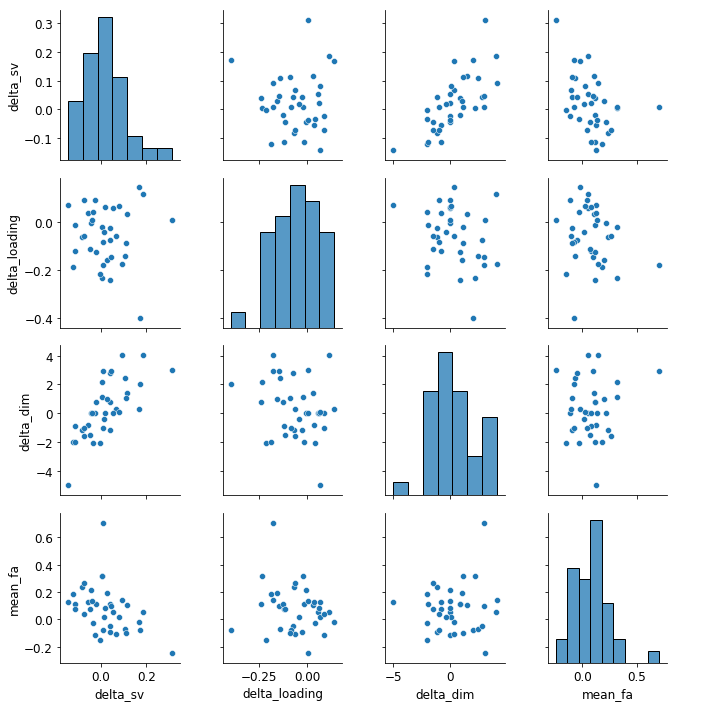

In [43]:
merge["delta_sv"] = merge["bp_sv"]-merge["sp_sv"]
merge["delta_loading"] = merge["bp_ls"] - merge["sp_ls"]
merge["delta_dim"] = merge["bp_dim"] - merge["sp_dim"]
_X = merge[["delta_sv", "delta_loading", "delta_dim", "mean_fa"]]
X = _X[["delta_sv", "delta_loading", "delta_dim"]]
sns.pairplot(_X)

In [44]:
# linear model to predict mean(delta dprime) from pop metrics
X = sm.add_constant(X)
y = merge["mean_fa"].astype(np.float)
X = X.astype({
    "delta_sv": np.float,
    "delta_loading": np.float,
    "delta_dim": np.float 
})
model = sm.OLS(y, X)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mean_fa   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     9.153
Date:                Tue, 15 Mar 2022   Prob (F-statistic):           0.000150
Time:                        09:12:26   Log-Likelihood:                 24.776
No. Observations:                  37   AIC:                            -41.55
Df Residuals:                      33   BIC:                            -35.11
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0913      0.025      3.660      0.001       0.041       0.142
delta_sv         -1.7033      0.336     -5.067      0.000      -2.387      -1.019
delta_loading     0.0171      0.196      0.087      0.931      -0.381       0.416
delta_dim         0.0670      0.017      3.925      0.000       0.032       0.102
==============================================================================
Omnibus:                       11.157   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               14.451
Skew:                           0.796   Prob(JB):                     0.000728
Kurtosis:                       5.616   Cond. No.                         31.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Delta dim')

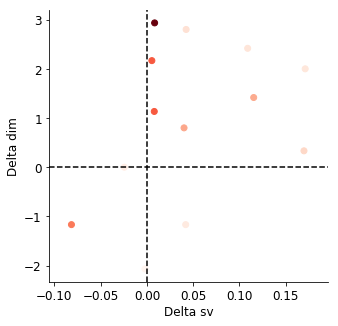

In [16]:
f, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.scatter(X["delta_sv"], X["delta_dim"], c=y, cmap="Reds")
ax.axhline(0, linestyle="--", color="k")
ax.axvline(0, linestyle="--", color="k")
ax.set_xlabel("Delta sv")
ax.set_ylabel("Delta dim")

In [125]:
merge[merge.site=="AMT026a"]

,mean,std,mean_fa,std_fa,pred_cc,site,batch,bp_sv,sp_sv,bp_dim,sp_dim,bp_dim_sem,sp_dim_sem,bp_ls,sp_ls,delta_sv,delta_loading,delta_dim
1,0.210951,0.223361,0.103802,0.137673,0.529661,AMT026a,331,0.223593,0.10823,4,2.58333,0.198373,0.378838,0.145484,0.114948,0.115363,0.0305364,1.41667


In [160]:
np.isnan(df_fa["delta"]).sum()

0

In [17]:
np.corrcoef(df[df["delta"].isna()==False]["delta"], df_fa[df["delta"].isna()==False]["delta"])

array([[1.        , 0.45577687],
       [0.45577687, 1.        ]])

In [166]:
np.isnan(df[df.isna()==False]["delta"].values.astype(float)).sum()

111